In [1]:
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

from jupyterthemes import jtplot

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
plt.rcParams['figure.figsize'] = 12, 8

In [3]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

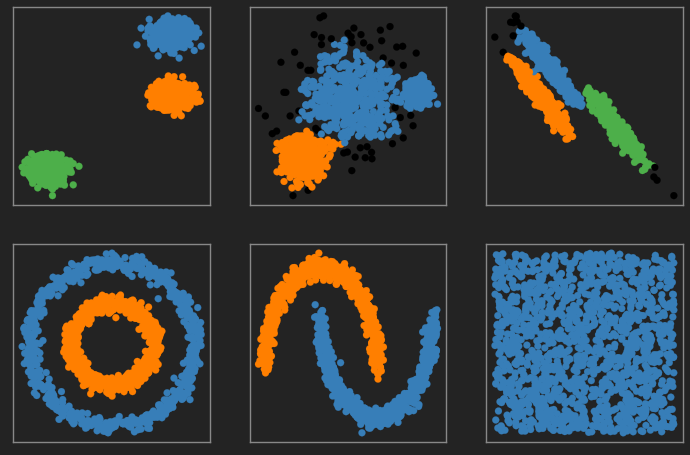

In [4]:
datasets_params_list = [
    (blobs, {'eps': 0.3}),
    (varied, {'eps': 0.18}),
    (aniso, {'eps': 0.184}),
    (noisy_circles, {'eps': 0.3}),
    (noisy_moons, {'eps': 0.3}),
    (no_structure, {'eps': 0.3})]

for i, (X, dbscan_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    dbscan = DBSCAN(eps=dbscan_params['eps'])
    
    dbscan.fit(X)
    y_pred = dbscan.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # чёрным цветом отметим выбросы
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

# Практика

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,
                min_samples=5)

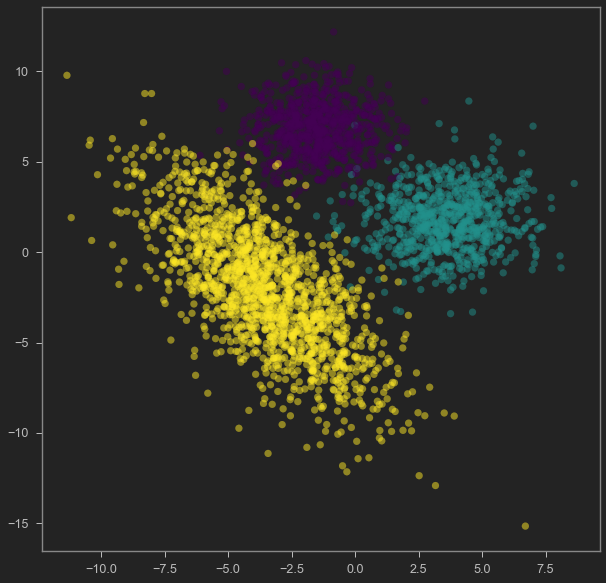

In [6]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [7]:
dbscan = DBSCAN(eps=0.9,
                min_samples=35)
y_pred = dbscan.fit_predict(X)

In [8]:
cluster_cnt = []
_,counts = np.unique(y_pred,return_counts=True)
for count in counts:
    cluster_cnt.append(count)
cluster_cnt

[368, 656, 721, 1255]

In [9]:
dbscan = DBSCAN(eps=0.8,
                min_samples=35)
y_pred = dbscan.fit_predict(X)

In [10]:
cluster_cnt = []
_,counts = np.unique(y_pred,return_counts=True)
for count in counts:
    cluster_cnt.append(count)
cluster_cnt

[583, 603, 681, 1133]

# 7.11. Коэффициент силуэта. Практика

In [11]:
from sklearn.metrics import silhouette_score
# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=kmeans_pred, metric='euclidean')

0.5131660482634046

## Задание 7.11.1

Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте коэффициент силуэта для получившейся кластеризации. Ответ округлите до десятых и запишите с точкой.

In [12]:
X1 = StandardScaler().fit_transform(X)

In [13]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3,random_state=42)
gm.fit(X1)
y_pred = gm.predict(X1)
# теперь посчитаем коэффициент силуэта
silhouette_score(X=X1, labels=y_pred, metric='euclidean')

0.5022144530587643

## Задание 7.11.2

Сравните результаты кластеризации четырёх рассмотренных алгоритмов на исходном датасете при помощи коэффициента силуэта, инициализируйте алгоритмы со следующими параметрами:


K-means — n_clusters=3, random_state=42


EM-алгоритм (GaussianMixture) — n_components=3, random_state=42


Агломеративная кластеризация – n_clusters=3


DBSCAN – eps=0.9, min_samples=35


Укажите максимальное значение коэффициента силуэта, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

In [14]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
k_means_score = silhouette_score(X=X, labels=kmeans_pred, metric='euclidean')

In [15]:
gm = GaussianMixture(n_components=3,random_state=42)
gm.fit(X)
y_pred = gm.predict(X)
# теперь посчитаем коэффициент силуэта
gm_score = silhouette_score(X=X, labels=y_pred, metric='euclidean')

In [16]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3)
y_pred_ac = ac.fit_predict(X)
# теперь посчитаем коэффициент силуэта
ac_score = silhouette_score(X=X, labels=y_pred_ac, metric='euclidean')

In [17]:
dbscan = DBSCAN(eps=0.9,
                min_samples=35)
y_pred_db = dbscan.fit_predict(X)

# теперь посчитаем коэффициент силуэта
db_score = silhouette_score(X=X, labels=y_pred_db, metric='euclidean')

In [18]:
print(f'Kmeans {k_means_score} \nGauss {gm_score} \nAglo {ac_score} \nDB {db_score}')

Kmeans 0.5131660482634046 
Gauss 0.3988405457243407 
Aglo 0.4811992210663849 
DB 0.4454335539277996


## Задание 7.11.3

Подберите оптимальное количество кластеров с помощью коэффициента силуэта. Для этого найдите такое число кластеров, при котором значение коэффициента будет максимальным.

В трёх из рассмотренных нами алгоритмов необходимо задать число кластеров при инициализации: K-means, EM-алгоритм и агломеративная кластеризация.

Найдите значение коэффициента силуэта для данных алгоритмов при числе кластеров от 2 до 10 включительно. Для K-means и EM-алгоритма установите значение random_state=42.

В качестве ответа через пробел введите число кластеров, при котором значение коэффициента силуэта для результатов кластеризации было наибольшим для каждого из алгоритмов. Вводите в следующем порядке: K-means, EM-алгоритм, агломеративная кластеризация.

In [19]:
km_score = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    kmeans_pred = kmeans.labels_
    km_score.append(silhouette_score(X=X, labels=kmeans_pred, metric='euclidean'))
km_score    

[0.45525850917271177,
 0.5131660482634046,
 0.5114118014309094,
 0.48208278531968773,
 0.46004229886156645,
 0.39789335922616964,
 0.33357737485627553,
 0.3279588779748603,
 0.3215688946087787]

In [20]:
gm_score = []
for i in range(2,11):
    gm = GaussianMixture(n_components=i,random_state=42)
    gm.fit(X)
    y_pred = gm.predict(X)
    # теперь посчитаем коэффициент силуэта
    gm_score.append(silhouette_score(X=X, labels=y_pred, metric='euclidean'))
gm_score

[0.45506572865005773,
 0.3988405457243407,
 0.510655066343949,
 0.4813621459449205,
 0.4628181210461304,
 0.397854908720611,
 0.32999199343917063,
 0.3130377197653585,
 0.2972718044706393]

In [21]:
ac_score = []
for i in range(2,11):
    ac = AgglomerativeClustering(n_clusters=i)
    y_pred_ac = ac.fit_predict(X)
    # теперь посчитаем коэффициент силуэта
    ac_score.append(silhouette_score(X=X, labels=y_pred_ac, metric='euclidean'))
ac_score

[0.40560374862968174,
 0.4811992210663849,
 0.48470679039805054,
 0.4732978942735451,
 0.4360547281175275,
 0.3610107002721555,
 0.3470279907723165,
 0.27831000812401474,
 0.281314682459535]

# 7.12. Однородность. Практика

In [22]:
from sklearn.metrics.cluster import homogeneity_score
# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
X = StandardScaler().fit_transform(X)
kmeans.fit(X)
kmeans_pred = kmeans.labels_  
# теперь посчитаем однородность 
homogeneity_score(labels_true=y, labels_pred=kmeans_pred)

0.804474693112785

## Задание 7.12.1

In [23]:
X = StandardScaler().fit_transform(X)

In [24]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_
k_homo = homogeneity_score(labels_true=y, labels_pred=kmeans_pred)
print(f'K_means {k_homo}')

gm = GaussianMixture(n_components=3,random_state=42)
gm.fit(X)
y_pred = gm.predict(X)
gm_homo = homogeneity_score(labels_true=y, labels_pred=y_pred)
print(f'Gauss {gm_homo}')

ac = AgglomerativeClustering(n_clusters=3)
y_pred_ac = ac.fit_predict(X)
aglo = homogeneity_score(labels_true=y, labels_pred=y_pred_ac)
print(f'Aglo {aglo}')

dbscan = DBSCAN(eps=0.9,
                min_samples=35)
y_pred_db = dbscan.fit_predict(X)
db_sc = homogeneity_score(labels_true=y, labels_pred=y_pred_db)
print(f'db {db_sc}')

K_means 0.804474693112785
Gauss 0.9339791347507893
Aglo 0.9099781767383747
db 0.00044465831964150197


# 7.13. Полнота. Практика

In [25]:
from sklearn.metrics.cluster import completeness_score
# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем полноту
completeness_score(labels_true=y, labels_pred=kmeans_pred)

0.7828224102025245

## Задание 7.13.1

Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте полноту для получившейся кластеризации. Ответ округлите до сотых и запишите с точкой. Не забудьте о стандартизации, она должна быть включена.

In [26]:
completeness_score(labels_true=y, labels_pred=y_pred)

0.9325740421656737

## Задание 7.13.2

Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи полноты, инициализируйте алгоритмы со следующими параметрами:

k-means — n_clusters=3, random_state=42

GaussianMixture — n_components=3, random_state=42

AgglomerativeClustering — n_clusters=3

DBSCAN — eps=0.9, min_samples=35

В качестве ответа укажите максимальное значение полноты, полученное при помощи данных моделей.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [27]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_
k_comp = completeness_score(labels_true=y, labels_pred=kmeans_pred)
print(f'K_means {k_comp}')

gm = GaussianMixture(n_components=3,random_state=42)
gm.fit(X)
y_pred = gm.predict(X)
gm_comp = completeness_score(labels_true=y, labels_pred=y_pred)
print(f'Gauss {gm_comp}')

ac = AgglomerativeClustering(n_clusters=3)
y_pred_ac = ac.fit_predict(X)
aglo_comp = completeness_score(labels_true=y, labels_pred=y_pred_ac)
print(f'Aglo {aglo_comp}')

dbscan = DBSCAN(eps=0.9,
                min_samples=35)
y_pred_db = dbscan.fit_predict(X)
db_sc_comp = completeness_score(labels_true=y, labels_pred=y_pred_db)
print(f'db {db_sc_comp}')

K_means 0.7828224102025245
Gauss 0.9325740421656737
Aglo 0.9058386997451113
db 0.08342237034907717


# 7.14. V-мера. Практика

In [28]:
from sklearn.metrics.cluster import v_measure_score
# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем полноту
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

0.793500872513578

## Задание 7.14.1

Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте v-меру для получившейся кластеризации.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [29]:
gm = GaussianMixture(n_components=3,random_state=42)
gm.fit(X)
y_pred = gm.predict(X)
gm_v = v_measure_score(labels_true=y, labels_pred=y_pred)
print(f'Gauss {gm_v}')

Gauss 0.9332760595996924


## Задание 7.14.2

Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи v-меры, инициализируйте алгоритмы со следующими параметрами:

k-means — n_clusters=3, random_state=42
GaussianMixture — n_components=3, random_state=42
AgglomerativeClustering — n_clusters=3
DBSCAN — eps=0.9, min_samples=35
В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

In [30]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_
k_v = v_measure_score(labels_true=y, labels_pred=kmeans_pred)
print(f'K_means {k_v}')

gm = GaussianMixture(n_components=3,random_state=42)
gm.fit(X)
y_pred = gm.predict(X)
gm_v = v_measure_score(labels_true=y, labels_pred=y_pred)
print(f'Gauss {gm_v}')

ac = AgglomerativeClustering(n_clusters=3)
y_pred_ac = ac.fit_predict(X)
aglo_v = v_measure_score(labels_true=y, labels_pred=y_pred_ac)
print(f'Aglo {aglo_v}')

dbscan = DBSCAN(eps=0.9,
                min_samples=35)
y_pred_db = dbscan.fit_predict(X)
db_sc_v = v_measure_score(labels_true=y, labels_pred=y_pred_db)
print(f'db {db_sc_v}')

K_means 0.793500872513578
Gauss 0.9332760595996924
Aglo 0.9079037199053294
db 0.000884601531943088


## Задание 7.14.3

равним модификации K-means с использованием случайной инициализации центроид и с использованием алгоритма K-means++ для инициализации центроид.

Для этого обучим на исходном датасете 2 модели k-means со следующими параметрами:

n_clusters=3, init='k-means++', n_init=1, random_state=42
n_clusters=3, init='random', n_init=1, random_state=42
В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [31]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_
k_v = v_measure_score(labels_true=y, labels_pred=kmeans_pred)
print(f'K_means {k_v}')

K_means 0.7892280957870129


In [32]:
kmeans = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)
kmeans.fit(X)
kmeans_pred_ = kmeans.labels_
k_v_ = v_measure_score(labels_true=y, labels_pred=kmeans_pred_)
print(f'K_means {k_v_}')

K_means 0.7892280957870129


## Задание 7.14.4

Теперь сравним k-means с ещё одной модификацией — K-means mini batch. Воспользоваться реализацией K-means mini batch в библиотеке sklearn можно следующим образом:

In [33]:
from sklearn.cluster import MiniBatchKMeans

kmeans_mini_batch = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans_mini_batch.fit(X)
kmeans_mini_batch_pred = kmeans_mini_batch.labels_
k_mini = v_measure_score(labels_true=y, labels_pred=kmeans_mini_batch_pred)
print(f'K_means_mini {k_mini}')

kmeans = KMeans(n_clusters=3, n_init=1, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_
k_v = v_measure_score(labels_true=y, labels_pred=kmeans_pred)
print(f'K_means {k_v}')

K_means_mini 0.7583969521655418
K_means 0.7892280957870129


## Задание 7.14.5

Рассмотрим агломеративную кластеризацию. Сравним, как влияет на качество кластеризации разный тип расстояния между кластерами.

Обучите на исходном датасете четыре модели AgglomerativeClustering с параметром n_clusters=3, меняя параметр linkage.

В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до десятых и запишите с точкой.

In [36]:
param = ['ward','complete', 'average', 'single']
for i in param:
    ac = AgglomerativeClustering(n_clusters=3, linkage=i)
    y_pred_ac = ac.fit_predict(X)
    aglo_v = v_measure_score(labels_true=y, labels_pred=y_pred_ac)
    print(f'{i} -  {aglo_v}')

ward -  0.9079037199053294
complete -  0.5805530251504777
average -  0.678656551579543
single -  0.0008842106330108959


## Задание 7.14.6 connectivity matrix Aglo

Сравним, как влияет предварительный расчёт матрицы смежности на качество агломеративной кластеризации.

Обучите на исходном датасете две модели AgglomerativeClustering:

с параметром n_clusters=3

с параметром n_clusters=3

и предварительно посчитанной матрицей смежности для объектов датасета

Построить матрицу смежности можно с помощью кода:

In [37]:
ac = AgglomerativeClustering(n_clusters=3)
y_pred_ac = ac.fit_predict(X)
aglo_v = v_measure_score(labels_true=y, labels_pred=y_pred_ac)
print(f'Without matrix {aglo_v}')

from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

ac_m = AgglomerativeClustering(n_clusters=3,connectivity=connectivity)
y_pred_ac_m = ac_m.fit_predict(X)
aglo_v_m = v_measure_score(labels_true=y, labels_pred=y_pred_ac_m)
print(f'With matrix {aglo_v_m}')

Without matrix 0.9079037199053294
With matrix 0.883942992495597


## Задание 7.14.7

Алгоритм DBSCAN очень требователен к параметрам: небольшое изменение в параметре eps или min_samples может изменить результат и качество кластеризации.

Обучите на исходном датасете две модели DBSCAN:

с параметрами eps=0.9, min_samples=35
с параметрами eps=0.8, min_samples=35
В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до сотых и запишите с точкой.

In [42]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X1, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [44]:
eps = [0.8, 0.9]
for i in eps:
    dbscan = DBSCAN(eps=i,
                min_samples=35)
    y_pred_db = dbscan.fit_predict(X1)
    db_sc_v = v_measure_score(labels_true=y, labels_pred=y_pred_db)
    print(f'db {db_sc_v}')


db 0.7063100442576922
db 0.7732549110297919


## Задание 7.14.8

Особенностью алгоритма DBSCAN является то, что помимо кластеризации этот алгоритм определяет выбросы в выборке. Посмотрим на качество кластеризации без учёта таких объектов.

Обучите на исходном датасете модель DBSCAN с параметрами eps=0.9, min_samples=35. Посчитайте значение v-меры только для основных и граничных объектов выборки, то есть для объектов, что не являются выбросами. Ответ округлите до сотых и запишите с точкой.

In [54]:
dbscan = DBSCAN(eps=.9,min_samples=35)
y_pred_db = dbscan.fit_predict(X1)

not_noise_ind = np.where(y_pred_db != -1)
db_sc_v = v_measure_score(y[not_noise_ind], y_pred_db[not_noise_ind])
print(f'db {np.round(db_sc_v,2)}')

db 0.97
